In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [11]:
age_mean = df["Age"].mean()
fare_mean = df["Fare"].mean()
age_mean, fare_mean

(29.69911764705882, 32.279338297872336)

In [14]:
age_median = df["Age"].median()
fare_median = df["Fare"].median()
age_median, fare_median

(28.0, 14.4542)

In [15]:
x = df.drop(columns="Survived")
y = df["Survived"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=None)

In [18]:
df["Age_mean"] = df["Age"].fillna(age_mean)
df["Age_median"] = df["Age"].fillna(age_median)
df.head()

,Age,Fare,Family,Survived,Age_mean,Age_median
0,22.0,7.2500,1,0,22.0,22.0
1,38.0,71.2833,1,1,38.0,38.0
2,26.0,7.9250,0,1,26.0,26.0
3,35.0,53.1000,1,1,35.0,35.0
4,35.0,8.0500,0,0,35.0,35.0


In [19]:
df["Fare_mean"] = df["Fare"].fillna(fare_mean)
df["Fare_median"] = df["Fare"].fillna(fare_median)
df.head()

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
0,22.0,7.2500,1,0,22.0,22.0,7.2500,7.2500
1,38.0,71.2833,1,1,38.0,38.0,71.2833,71.2833
2,26.0,7.9250,0,1,26.0,26.0,7.9250,7.9250
3,35.0,53.1000,1,1,35.0,35.0,53.1000,53.1000
4,35.0,8.0500,0,0,35.0,35.0,8.0500,8.0500


# lets see the change in variance of the dataset:

In [21]:
df.cov()

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.196997
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.611725
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.021945
Age_mean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,58.639842
Age_median,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,61.706696
Fare_mean,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
Fare_median,73.196997,2530.673077,16.611725,6.021945,58.639842,61.706696,2402.717697,2417.971600


# lets see the change in corelation of the dataset:

In [22]:
df.corr()

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.096203
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209378
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.251678
Age_mean,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.091718
Age_median,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.096384
Fare_mean,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,0.996841
Fare_median,0.096203,1.000000,0.209378,0.251678,0.091718,0.096384,0.996841,1.000000


# now visually see the changes:

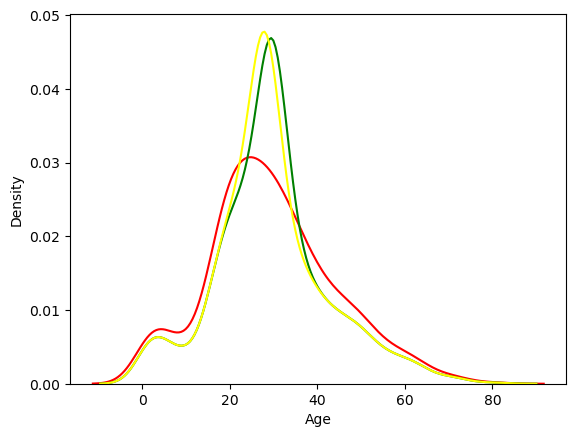

In [46]:
sns.kdeplot(x = df["Age"], color = "red", label = "Age")
sns.kdeplot(x = df["Age_mean"], color = "green", label = "Age_mean")
sns.kdeplot(x = df["Age_median"], color = "yellow", label = "Age_median")
plt.show()

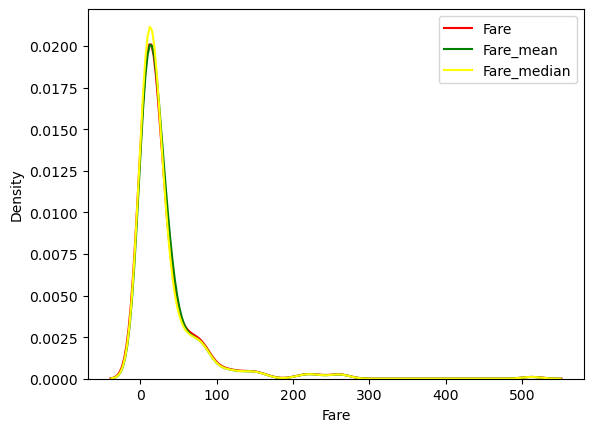

In [44]:
sns.kdeplot(x=df["Fare"], color="red", label="Fare")
sns.kdeplot(x=df["Fare_mean"], color="green", label="Fare_mean")
sns.kdeplot(x=df["Fare_median"], color="yellow", label="Fare_median")
plt.legend()

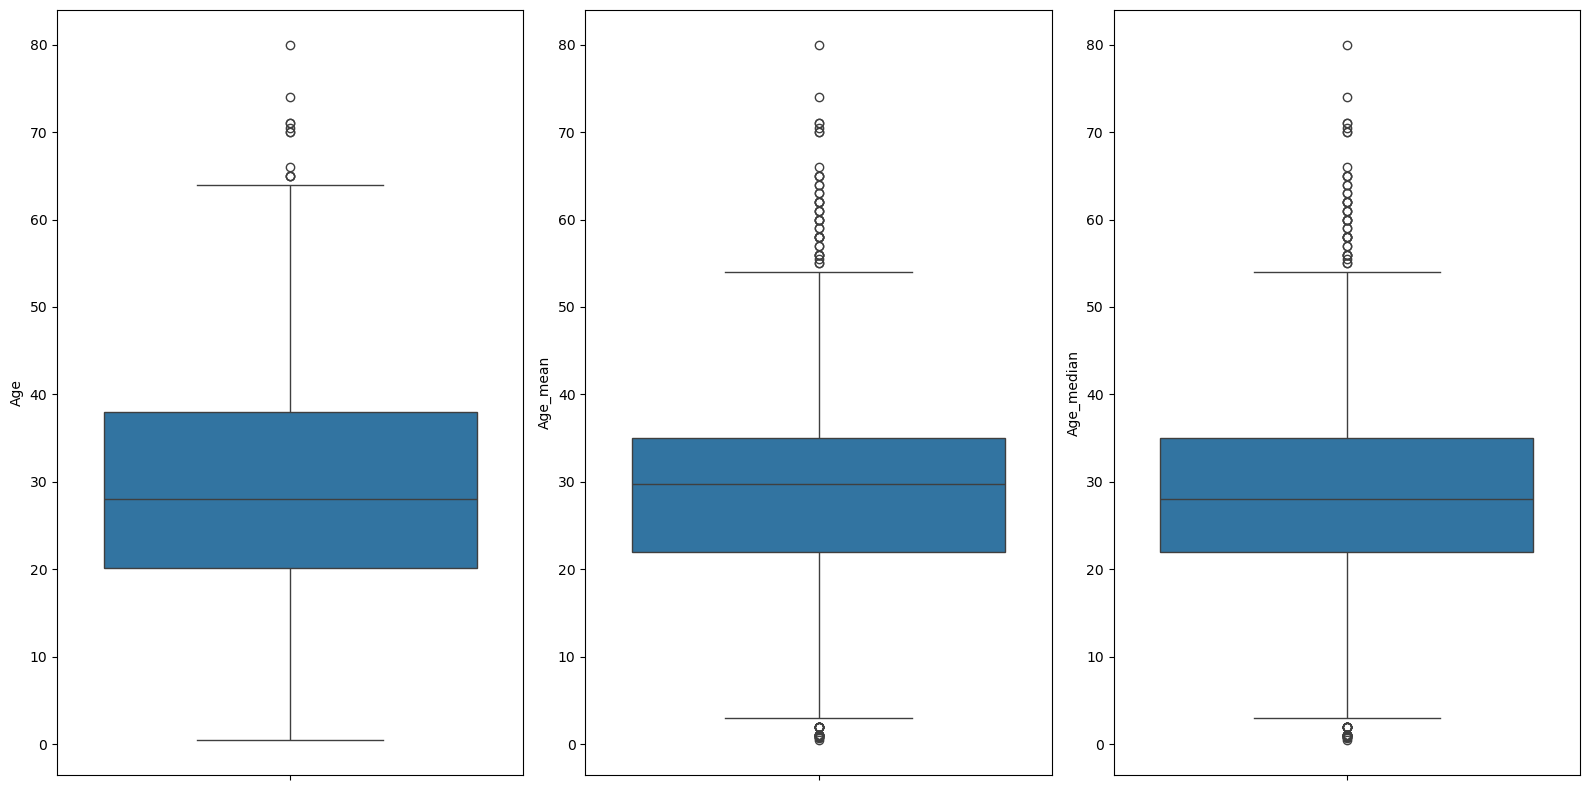

In [70]:
fig, axes = plt.subplots(1, 3, figsize = (16, 8))
sns.boxplot(y = df["Age"], ax=axes[0])
sns.boxplot(y = df["Age_mean"], ax=axes[1])
sns.boxplot(y = df["Age_median"], ax=axes[2])
plt.tight_layout()
plt.show()

# after filling values with mean and median we can see out data has filly loaded with out-lairs so we need to use anotyer technique. 

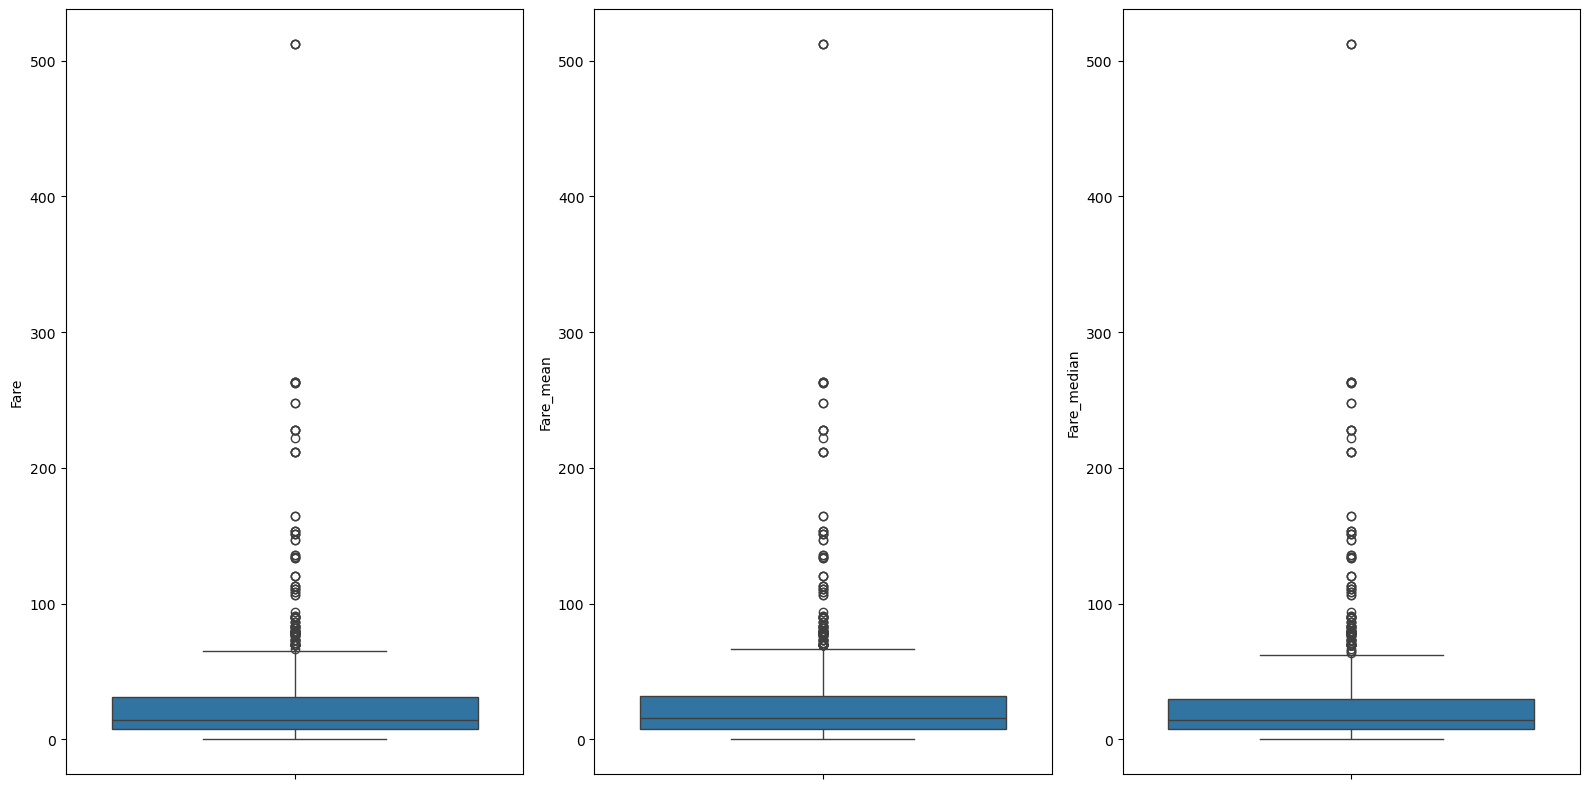

In [78]:
fig, axes = plt.subplots(1, 3, figsize = (16, 8))
sns.boxplot(y = df["Fare"], ax=axes[0])
sns.boxplot(y = df["Fare_mean"], ax=axes[1])
sns.boxplot(y = df["Fare_median"], ax=axes[2])
plt.tight_layout()
plt.show()

# after filling values with mean and median we can see out data has no changes so it is completly fine.